# Data Analysis and Visualization Notebook

This Jupyter Notebook is dedicated to the analysis and visualization of customer data from the `DM2425_ABCDEats_DATASET.csv` file. The notebook includes various steps to clean, analyze, and visualize the data to extract meaningful insights.

## Table of Contents

1. **Importing Packages and Data**
    - Import necessary libraries such as `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.
    - Load the dataset into a DataFrame.

2. **Feature Engineering**
    - Create new features such as `delta_day_order`, `tot_value_cui`, `order_freq`, `value_freq`, `avg_order_value` and `avg_order_value`
    - Append these new features to a list for further analysis.

3. **Descriptive Statistics for Hour Features**
    - Check for NaN and infinite values in the hour features.
    - Describe the hour features to understand their statistical properties.

4. **Hours VS Regions**
    - Explore regional differences in ordering behavior by time of day.
    - Summarize customer region statistics by different hours.
    - Visualize the distribution and impact of the customer region on the hours they placed a order.
    .

5. **Hours vs Age**
    - Understand how age groups behave in relation to ordering times.
    - Analyze and visualize the impact of customer age on order behavior by time of the day.
    - Create a heatmap to see the distribution of the order placing by hour for the differente ages.
    

## Key Variables

- `df`: The main DataFrame containing the customer data.
- `noNaN_df`: DataFrame after removing rows with NaN values.
- `new_fetures_list`: List of newly engineered features.
- `region_stats`: DataFrame summarizing statistics for different regions.
- `age_order_freq`, `age_order_value_mean`, `age_value_freq`, etc.: DataFrames containing age-related metrics.
- `avg_age_per_region`, `avg_order_value_per_region`, etc.: Series containing region-related metrics.

This notebook provides a comprehensive analysis of customer data, focusing on age and region-specific insights, and employs various visualization techniques to present the findings effectively.

# 1. importing packages and data


In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
file_path = 'DM2425_ABCDEats_DATASET.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(file_path)
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Summarise key statistics for the data frame

In [3]:
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,30723.0,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.0000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,0.768096,1.431218,0.884359,0.950203,1.631153,3.233411,2.995379,0.711676,2.999913,3.913253,0.841697,0.555914,0.567486,0.591006,0.619449,0.677747,0.652973,0.704246,0.0,0.053845,0.063190,0.118759,0.101700,0.081943,0.069681,0.0768,0.131899,0.233912,0.329560,0.378167,0.314162,0.236453,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,3.657273,8.191755,5.259868,5.830590,7.443234,11.247990,10.180851,4.536457,9.768300,15.548507,4.433047,1.013601,1.044090,1.045907,1.069672,1.088122,1.069947,1.167446,0.0,0.317013,0.351498,0.500862,0.437493,0.358705,0.329461,0.3777,0.635582,0.724906,0.891161,0.959961,0.842484,0.637502,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,

# 2. Features Engineering

In [4]:
new_fetures_list = []

### delta_day_order
shows the time passed beween the first order and the last order
-- note:
we could adjust the parameter by using the highest day for the last order in the dataframe as today

In [5]:

df['delta_day_order'] = df['last_order'] - df['first_order'] + 1
new_fetures_list.append('delta_day_order')

### tot_value_cui
shows the total amunt of money spent on the app across all options

In [6]:
cui_columns = [col for col in df.columns if col.startswith('CUI')]
df['tot_value_cui'] = df[cui_columns].sum(axis=1)
new_fetures_list.append('tot_value_cui')

### frequencies and averages
more insightful informations about our customers habits

In [7]:
df['order_freq'] = df['product_count'] / df['delta_day_order']
df['value_freq'] = df['tot_value_cui'] / df['delta_day_order']
df['avg_order_value'] = df['tot_value_cui'] / df['product_count']
df['Recency'] = 90 - df['last_order']

new_fetures_list.append('order_freq')
new_fetures_list.append('value_freq')
new_fetures_list.append('avg_order_value')

In [8]:
# Check if NaN is better than 0
df['avg_order_value'] = np.where(df['product_count'] != 0, df['tot_value_cui'] / df['product_count'], 0)

# Replace '-' with NaN
df['customer_region'].unique()
df.replace('-', np.nan, inplace=True)

Check if there are Duplicare rows

In [9]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows if any
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
    print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
else:
    print("No duplicate rows found.")

# Drop duplicate rows
df.drop_duplicates(inplace=True)

Duplicate rows found:
      customer_id customer_region  customer_age  vendor_count  product_count  \
3379   b55012ee1c            8550          23.0             4             11   
7887   24251eb7da            8550          28.0             4              8   
16230  671bf0c738            8550          25.0             4              7   
20907  742ca068fc            8550          20.0             1              2   
24329  df91183978            8550          23.0             2              3   
24827  6bbf5f74cd            8550          22.0            10             20   
25793  8aa9bbc147            8550          24.0             2              4   
27515  cf563a0a98            8550          27.0             2              2   
27739  201a13a34d            8550          28.0             2              2   
28713  06018a56be            8550          27.0             2              2   
29926  fac7984c0d            8550          29.0             1              1   
30416  b8e7a643a4 

In [10]:
df.head(10)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,delta_day_order,tot_value_cui,order_freq,value_freq,avg_order_value,Recency
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2.0,28.88,2.500000,14.440000,5.776000,89
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2.0,19.21,1.000000,9.605000,9.605000,89
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.0,9.20,1.000000,4.600000,4.600000,89
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.0,0.0,0.00,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,3.0,31.56,1.000000,10.520000,10.520000,88
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,NaN,DIGI,14.57,40.87,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,55.44,1.666667,18.480000,11.088000,88
5,6aef2b6726,8670,40.0,2,2,0,0.0,2,FREEBIE,DIGI,0.00,24.92,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,24.92,0.666667,8.306667,12.460000,88
6,8475ee66ef,2440,24.0,2,2,2,0.0,2,NaN,CARD,5.88,0.00,1.53,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,3.0,7.41,0.666667,2.470000,3.705000,88
7,f2f53bcc67,8670,27.0,2,3,2,0.0,2,DISCOUNT,DIGI,11.71,0.00,24.40,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3.0,36.11,1.000000,12.036667,12.036667,88
8,5b650c89cc,2360,20.0,3,4,2,0.0,3,DISCOUNT,DIGI,2.75,0.00,0.00,0.0,0.0,0.0,0.0,4.39,0.00,0.0,0.0,0.0,7.3,0.0,0.0,0,0,1,0,0,0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,4.0,14.44,1.000000,3.610000,3.610000,87
9,84775a7237,8670,20.0,2,3,0,0.0,3,DELIVERY,CARD,0.00,32.48,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,32.48,0.750000,8.120000,10.826667,87


# Hours Analysis

# 3. Descriptive Statistics for Hour Feature
##### Objective: Summarize the key characteristics of the hour feature.


In [11]:
#See with hours columns have NaN
hr_columns = [col for col in df.columns if col.startswith('HR')]
df[hr_columns].isna().sum()
# We see that HR_0 has 1 NaN value, but despite that the other value is 0, so that means that are no orders ate midnight. We will leave it as it is.

HR_0     1164
HR_1        0
HR_2        0
HR_3        0
HR_4        0
HR_5        0
HR_6        0
HR_7        0
HR_8        0
HR_9        0
HR_10       0
HR_11       0
HR_12       0
HR_13       0
HR_14       0
HR_15       0
HR_16       0
HR_17       0
HR_18       0
HR_19       0
HR_20       0
HR_21       0
HR_22       0
HR_23       0
dtype: int64

3.1 Calculate basic statistics  for orders placed at different hours.

In [12]:
df[hr_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
HR_0,30711.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
HR_1,31875.0,0.053835,0.317031,0.0,0.0,0.0,0.0,14.0
HR_2,31875.0,0.063153,0.351490,0.0,0.0,0.0,0.0,12.0
HR_3,31875.0,0.118306,0.497117,0.0,0.0,0.0,0.0,11.0
HR_4,31875.0,0.101710,0.437549,0.0,0.0,0.0,0.0,14.0
HR_5,31875.0,0.081914,0.358701,0.0,0.0,0.0,0.0,7.0
HR_6,31875.0,0.069616,0.329307,0.0,0.0,0.0,0.0,8.0
HR_7,31875.0,0.076675,0.377349,0.0,0.0,0.0,0.0,15.0
HR_8,31875.0,0.131859,0.635603,0.0,0.0,0.0,0.0,52.0
HR_9,31875.0,0.233945,0.725015,0.0,0.0,0.0,0.0,23.0


3.2 Plot a histogram or bar plot to visualize the overall distribution of orders across the 24-hour period.

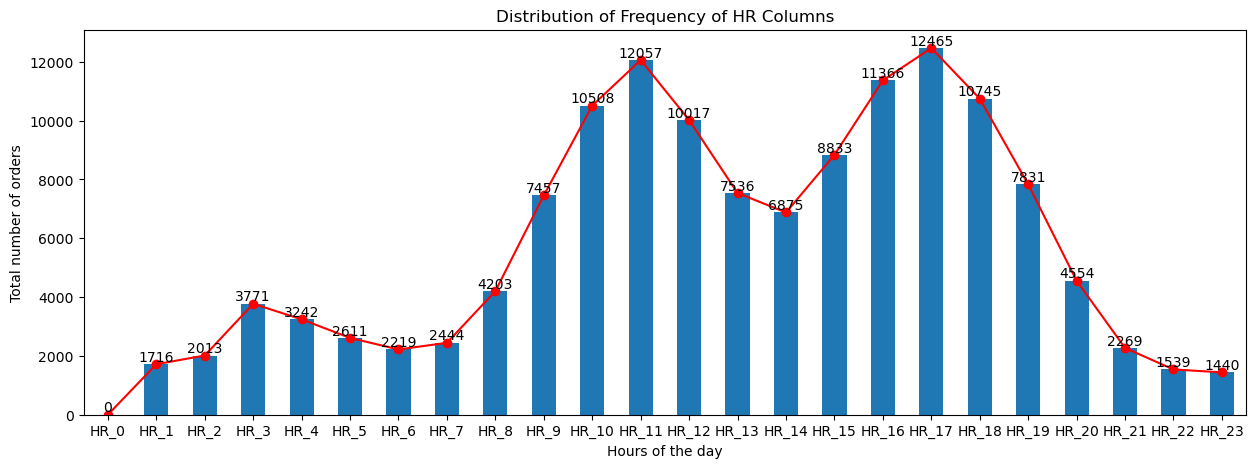

In [13]:
df[hr_columns].sum().plot(kind='bar')
plt.title('Distribution of Frequency of HR Columns')
plt.xlabel('Hours of the day')

# Add value labels on top of each bar
for index, value in enumerate(df[hr_columns].sum()):
    plt.text(index, value, str(int(value)), ha='center', va='bottom')
plt.ylabel('Total number of orders')
df[hr_columns].sum().plot(kind='line', color='red', marker='o')
plt.gcf().set_size_inches(15, 5)  # Set the figure size to be larger horizontally
plt.show()

As we can see, the costumers tend to order more in the morning and in the evening schedule. The most popular time is 11am am and 6pm
Besides that, there is a significant drop in the number of orders placed at dawn and late night.
At lunch time, there is a low decrease in the number of orders placed.

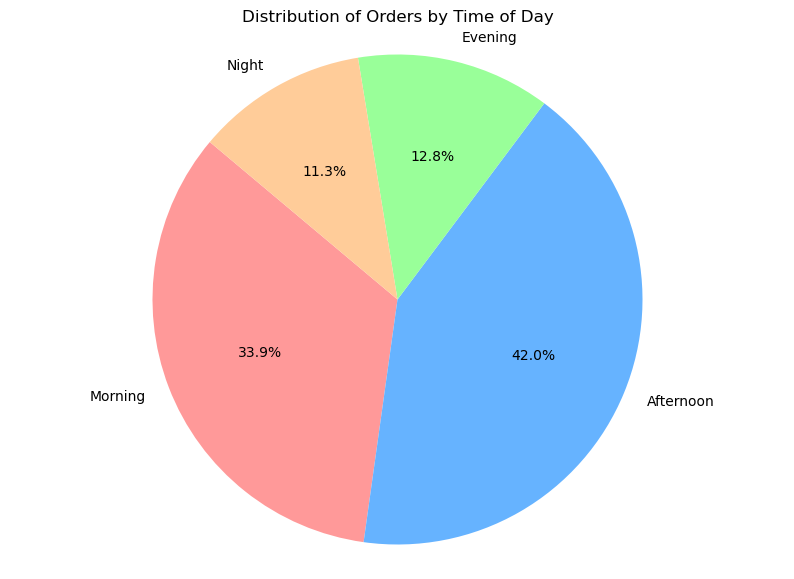

In [14]:
#lets dividie the hours in 4 categories: Morning, Afternoon, Evening and Night
morning_hours = [f'HR_{i}' for i in range(7, 13)]  # 7am to 12pm
afternoon_hours = [f'HR_{i}' for i in range(13, 19)] # 1pm to 6pm
evening_hours = [f'HR_{i}' for i in range(19, 24)]   # 7pm to 11pm
night_hours = [f'HR_{i}' for i in range(0, 7)]        # 12am to 6am

# Calculate the total orders for each time category
morning_orders = df[morning_hours].sum().sum()
afternoon_orders = df[afternoon_hours].sum().sum()
evening_orders = df[evening_hours].sum().sum()
night_orders = df[night_hours].sum().sum()

# Data for the pie chart
time_categories = ['Morning', 'Afternoon', 'Evening', 'Night']
orders = [morning_orders, afternoon_orders, evening_orders, night_orders]

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(orders, labels=time_categories, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Orders by Time of Day')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

We can clearly see that most of the orders are mad in the afternoon and in the morning period.

now lets see the variability of each time period. 

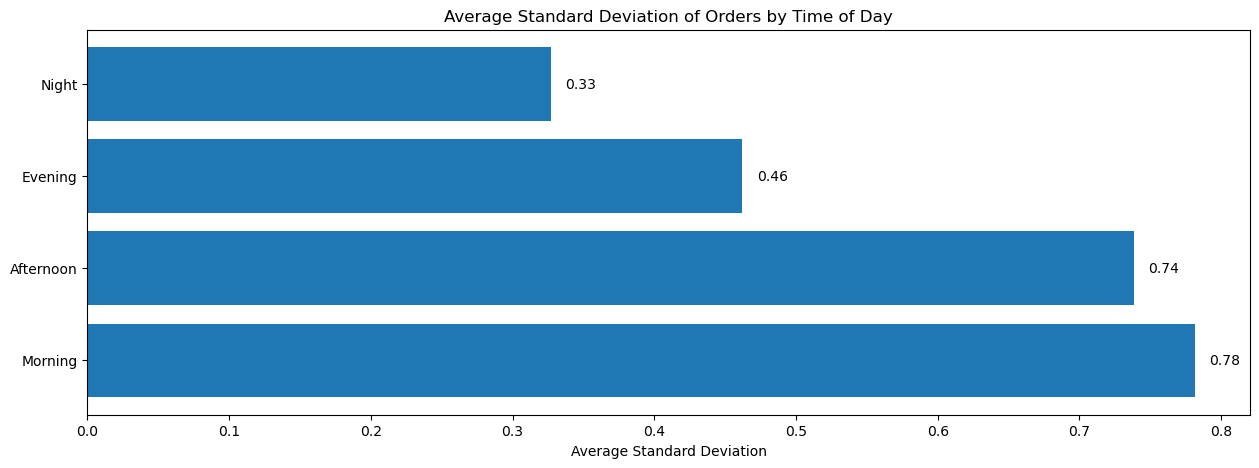

In [15]:
# Calculate the standard deviation for each time category
morning_std = df[morning_hours].std().mean()
afternoon_std = df[afternoon_hours].std().mean()
evening_std = df[evening_hours].std().mean()
night_std = df[night_hours].std().mean()

# Build a horizontal bar chart
time_categories = ['Morning','Afternoon', 'Evening', 'Night']
std_devs = [morning_std, afternoon_std, evening_std, night_std]
# Sort the standard deviations in descending order
std_devs_sorted = sorted(std_devs, reverse=True)

plt.figure(figsize=(15, 5))
bars = plt.barh(time_categories, std_devs_sorted)
# Add the standard deviation values to the bars
for bar, std_dev in zip(bars, std_devs_sorted):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{std_dev:.2f}', va='center')

plt.xlabel('Average Standard Deviation')
plt.title('Average Standard Deviation of Orders by Time of Day')
plt.show()

we can also see that the periods with more orders are the ones that also have the higher variability. 

Lets see the cumulative graphic of the orders by time of the day.

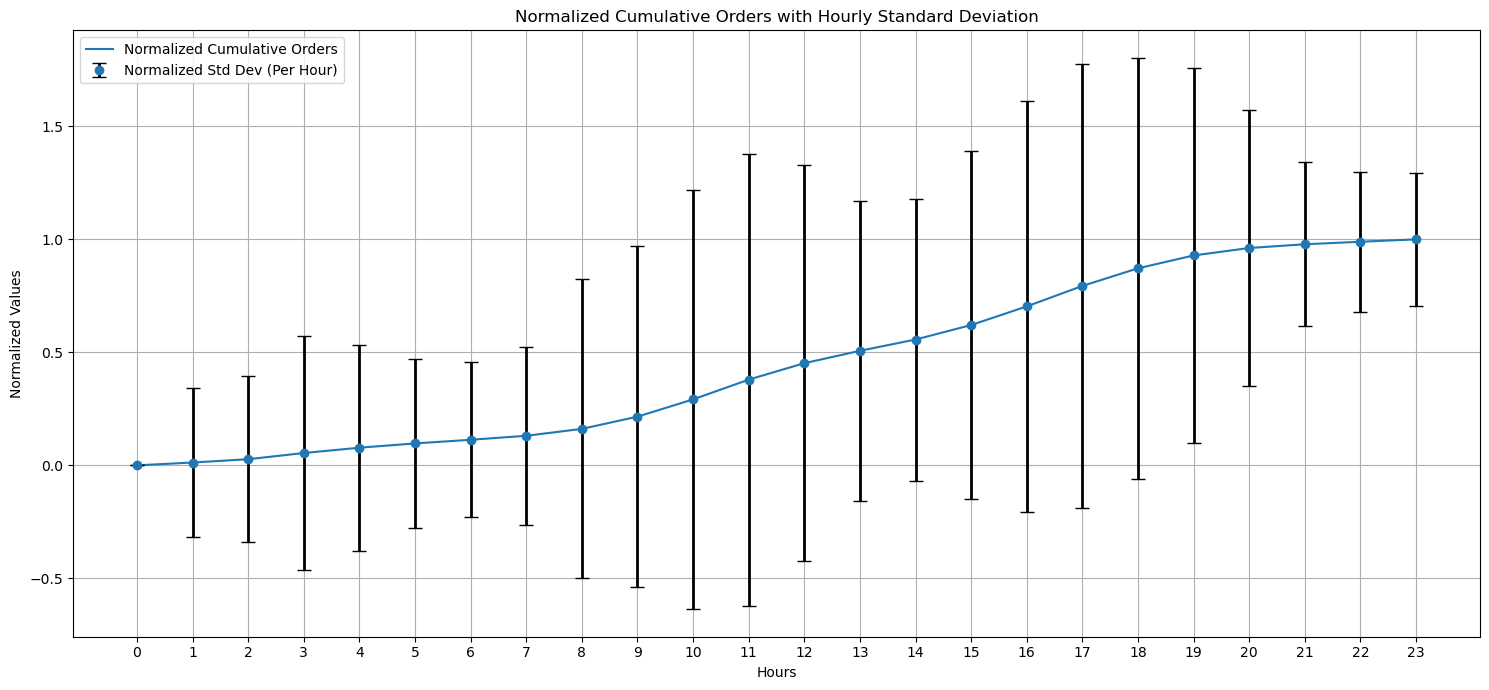

In [16]:
# Total sum of orders per hour and then the cumulative sum
orders_sum_cumulative = df[hr_columns].sum().cumsum()

# Standard deviation per hour (non-cumulative)
std_dev = df[hr_columns].std()

# Normalize the cumulative sum and standard deviation (Min-Max normalization)
scaler = MinMaxScaler()
orders_sum_cumulative_normalized = scaler.fit_transform(orders_sum_cumulative.values.reshape(-1, 1)).flatten()
std_dev_normalized = scaler.fit_transform(std_dev.values.reshape(-1, 1)).flatten()

# Hours array (0 to 23)
hours = np.arange(24)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 7)) 

# Plot the normalized cumulative orders
ax.plot(hours, orders_sum_cumulative_normalized, color='C0', label='Normalized Cumulative Orders')

# Add error bars representing the normalized non-cumulative standard deviation at each hour
ax.errorbar(hours, orders_sum_cumulative_normalized, yerr=std_dev_normalized, fmt='o', color='C0', 
            ecolor='black', elinewidth=2, capsize=5, label='Normalized Std Dev (Per Hour)')

# Customize the plot
plt.title('Normalized Cumulative Orders with Hourly Standard Deviation')
plt.xlabel('Hours')
plt.ylabel('Normalized Values')
plt.legend()
plt.xticks(hours)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


General trend: Sales start at a low level at the beginning of the day (HR_0), increase slowly during the first few hours, and from a certain point (around HR_10 to HR_11), the growth rate accelerates significantly until HR_19. After that, the growth slows down and eventually stabilizes around HR_22.

Period of greatest growth: The graph indicates that sales start to grow more rapidly from HR_10, with the sharpest increase between HR_10 and HR_19. This suggests that these are the peak sales hours.

Stabilization: After HR_20, the growth in sales begins to slow down, with the values stabilizing until the end of the day, indicating that the sales volume reaches a plateau.

Initial behavior: In the early hours of the day (HR_0 to HR_6), the growth in sales is quite slow, which may indicate a low volume of activity or sales during the first hours.

Conclusion: This graph suggests a typical sales pattern throughout a day, with a relatively quiet morning, a significant increase in the afternoon, and a slowdown and stabilization in the evening. This could be useful for optimizing operating hours or promotional campaigns during peak activity periods.

### Also the hours of the day that are more orders the variability is bigger TAKE A DOUBT

# 4. Hours vs. Regions
##### Objective: Explore regional differences in ordering behavior by time of day.

In [17]:
# Group by 'customer_region' and sum the hour columns, displaying all columns
pd.set_option('display.max_columns', None)
region_hour_sum = df.groupby('customer_region')[hr_columns].sum()

# Display the resulting table
region_hour_sum

,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_region,,,,,,,,,,,,,,,,,,,,,,,,
2360,0.0,322,227,132,75,61,82,342,1030,1316,2065,4962,4894,3237,2273,1992,2342,4069,5206,4789,3095,1441,803,599
2440,0.0,50,21,22,5,6,16,51,133,230,371,654,679,490,372,392,423,695,833,794,510,285,157,103
2490,0.0,19,20,7,8,5,5,20,43,52,116,225,200,142,95,83,119,186,190,205,125,64,27,36
4140,0.0,16,8,2,2,2,1,13,43,125,163,155,125,140,209,362,422,371,243,127,49,60,47,29
4660,0.0,81,34,12,11,55,211,444,1053,2594,3868,2794,1949,1862,2524,4942,7350,6749,4071,1808,686,346,235,150
8370,0.0,43,80,122,98,85,66,56,59,107,136,111,78,48,54,42,23,6,4,0,4,3,12,21
8550,0.0,1,2,16,1,2,3,5,3,2,1,2,1,4,1,1,0,2,0,1,0,0,0,1
8670,0.0,1132,1551,3314,2922,2299,1752,1457,1756,2921,3644,3039,1999,1556,1289,970,653,370,189,100,84,64,249,462


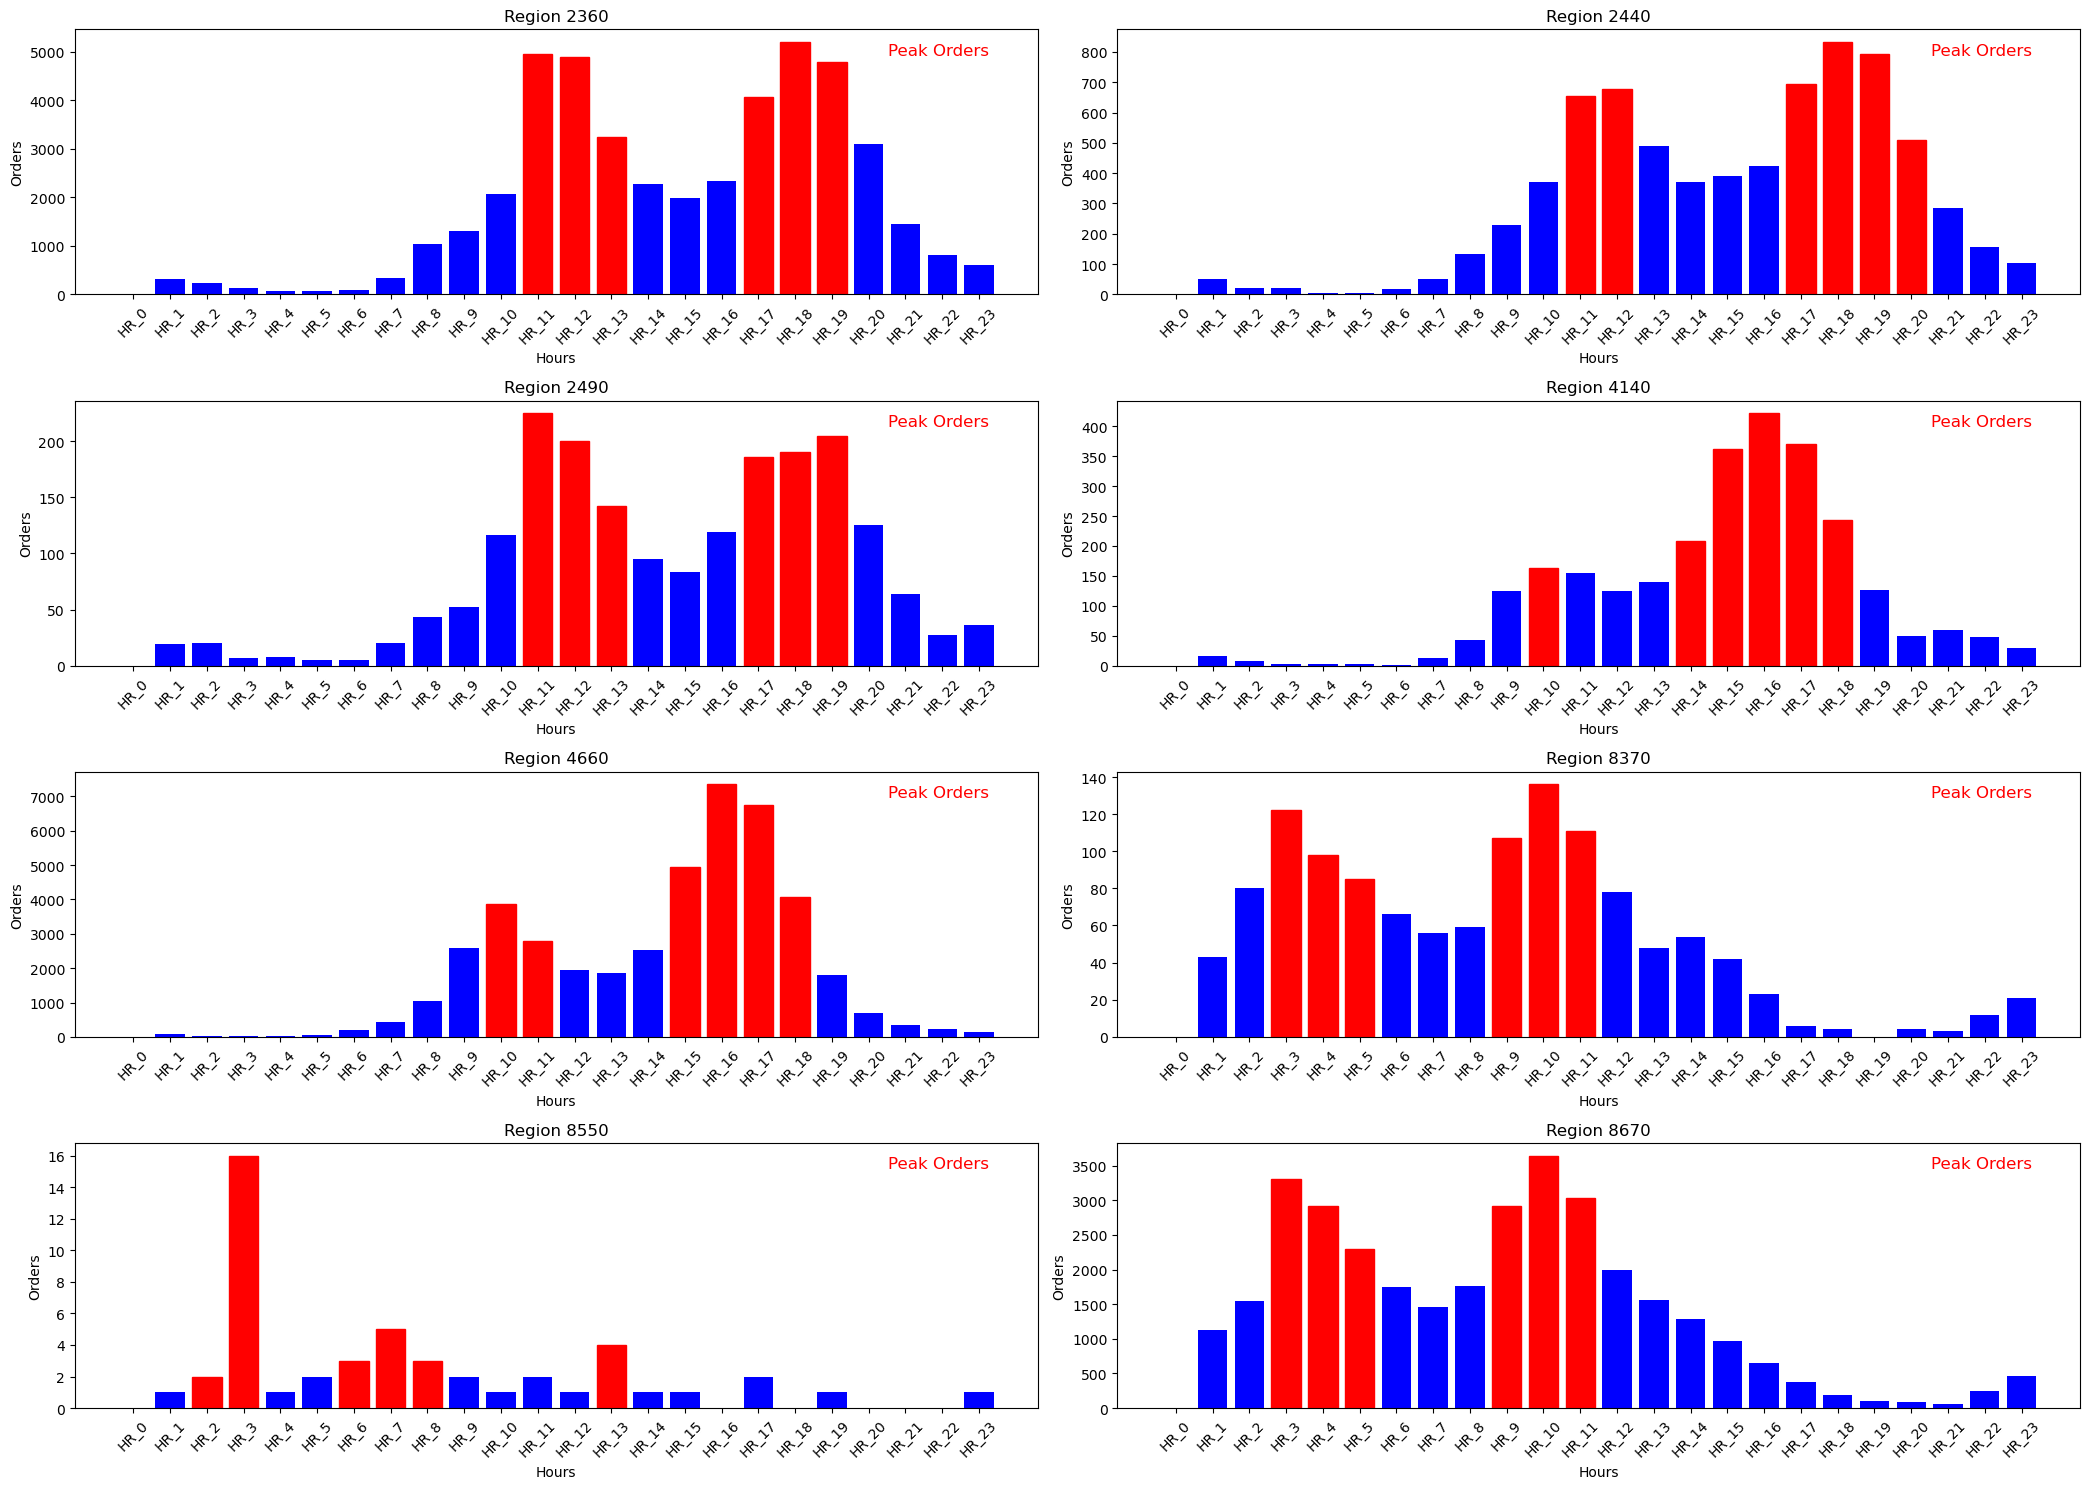

In [18]:
# Define o número de regiões e subplots
num_regions = len(region_hour_sum)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(21, 15))  

# Garante que o gráfico tenha um layout limpo
axes = axes.flatten()  # Achata os eixos para iteração

# Plota os histogramas de cada região em seu subplot respectivo
for idx, (region, data) in enumerate(region_hour_sum.iterrows()):
    # Get the top 6 order hours
    top_6_hours = data.nlargest(6).index

    # Plot all bars in blue
    bars = axes[idx].bar(region_hour_sum.columns, data.values, color='blue')

    # Highlight the top 5 order hours in red
    for bar, hour in zip(bars, region_hour_sum.columns):
        if hour in top_6_hours:
            bar.set_color('red')
    axes[idx].set_title(f'Region {region}')
    axes[idx].set_xlabel('Hours')
    axes[idx].set_ylabel('Orders')
    # Add label in the top corner saying "Peak Order" with the color red
    axes[idx].text(0.95, 0.95, 'Peak Orders', color='red', fontsize=12, ha='right', va='top', transform=axes[idx].transAxes)

    # Rotaciona os valores do eixo x para que fiquem legíveis
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Since our goal is not to count the number of orders per region, but rather to examine their distribution over the hours of the day, the focus will be the distributions and not the absolute values.

From the analysis of the figures, we can observe that the region where the customer is located significantly influences their purchasing habits, particularly in terms of the times when they place their orders.

In regions 2630, 2490, and 2440, we see that the distribution follows the general trend previously presented, with the majority of orders placed around 11 a.m. and 5 p.m.

Regions 4660 and 4140 also align with the general distribution but show a drop in order volume during the late morning (around 11 a.m.).

Regions 8370 and 8670 exhibit a similar pattern, with a focus on orders placed during the dawn, peaking at 3 a.m., and again in the morning, with a peak at 10 a.m. During lunch and dinner times, the number of orders is significantly lower.

Finally, in region 8550, although the dataset is not large enough to draw definitive conclusions, the distribution reveals a single peak in order activity at 3 a.m.





In [19]:
df.groupby('customer_region')['customer_age'].agg(['mean', 'median'])

,mean,median
customer_region,,
2360,27.474620,26.0
2440,27.633793,26.0
2490,27.194064,26.0
4140,27.650299,26.0
4660,27.525177,26.0
8370,27.708678,26.0
8550,25.000000,25.0
8670,27.514929,26.0


We can also observe the different purchasing patterns throughout various periods of the day across different regions using the pie charts above.

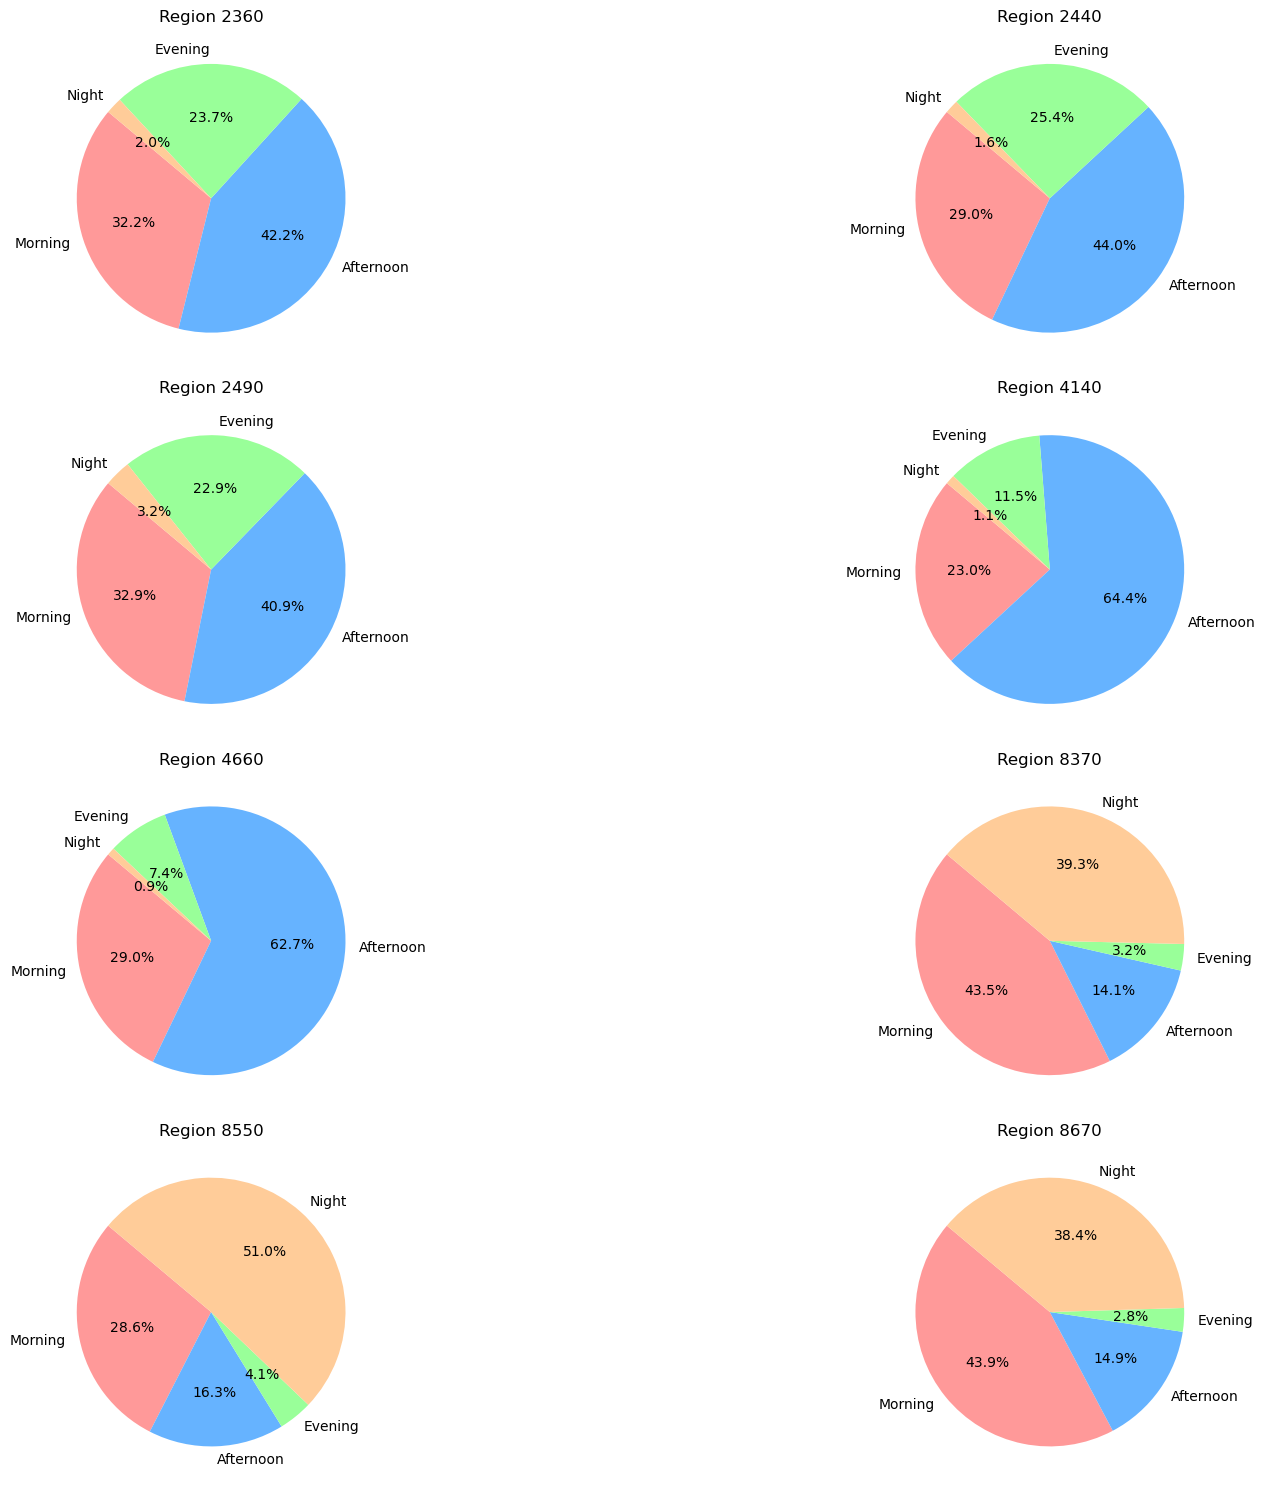

In [20]:
# Define o número de regiões e subplots
num_regions = len(region_hour_sum)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(21, 15))  

# Garante que o gráfico tenha um layout limpo
axes = axes.flatten()  # Achata os eixos para iteração
# Calculate the total orders for each time category for each region
for idx, (region, data) in enumerate(region_hour_sum.iterrows()):
    morning_orders = data[morning_hours].sum()
    afternoon_orders = data[afternoon_hours].sum()
    evening_orders = data[evening_hours].sum()
    night_orders = data[night_hours].sum()

    # Data for the pie chart
    orders = [morning_orders, afternoon_orders, evening_orders, night_orders]

    # Plotting the pie chart
    axes[idx].pie(orders, labels=time_categories, autopct='%1.1f%%', startangle=140, 
                  colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
    axes[idx].set_title(f'Region {region}')

plt.tight_layout()
plt.show()

As we can see, the average and median ages for each region are identical, so the differences in the distribution of order times are likely not related to the age of customers in each region, but rather to others cultural factors specific to each region.

#

# 5. Hour vs. Customer Age
##### Objective: Understand how age groups behave in relation to ordering times.

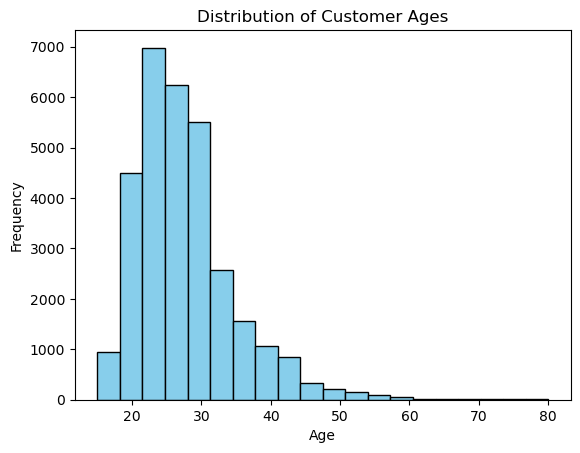

In [21]:
# See the distribution of the customer ages
df['customer_age'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.show()

We can see that our customer ages are mainly between 20 to 50 years old

In [22]:
df.groupby('customer_age')[hr_columns].sum()

,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_age,,,,,,,,,,,,,,,,,,,,,,,,
15.0,0.0,1,3,2,4,3,0,5,4,4,6,8,9,4,4,2,3,4,14,5,0,2,0,0
16.0,0.0,7,5,19,21,7,8,7,13,18,33,34,18,15,10,16,37,29,31,22,9,7,3,3
17.0,0.0,16,19,22,18,12,18,29,72,45,70,86,81,55,61,72,83,117,68,51,40,13,15,11
18.0,0.0,19,34,76,67,50,35,41,62,109,203,239,189,127,112,140,233,228,196,130,80,38,31,15
19.0,0.0,61,62,97,102,75,77,90,127,269,339,393,300,221,195,276,329,402,328,261,131,52,63,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76.0,0.0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,1,0,0,0,0,0
77.0,0.0,0,0,0,0,5,1,0,0,0,2,2,0,2,1,0,5,1,2,2,0,0,0,0
78.0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


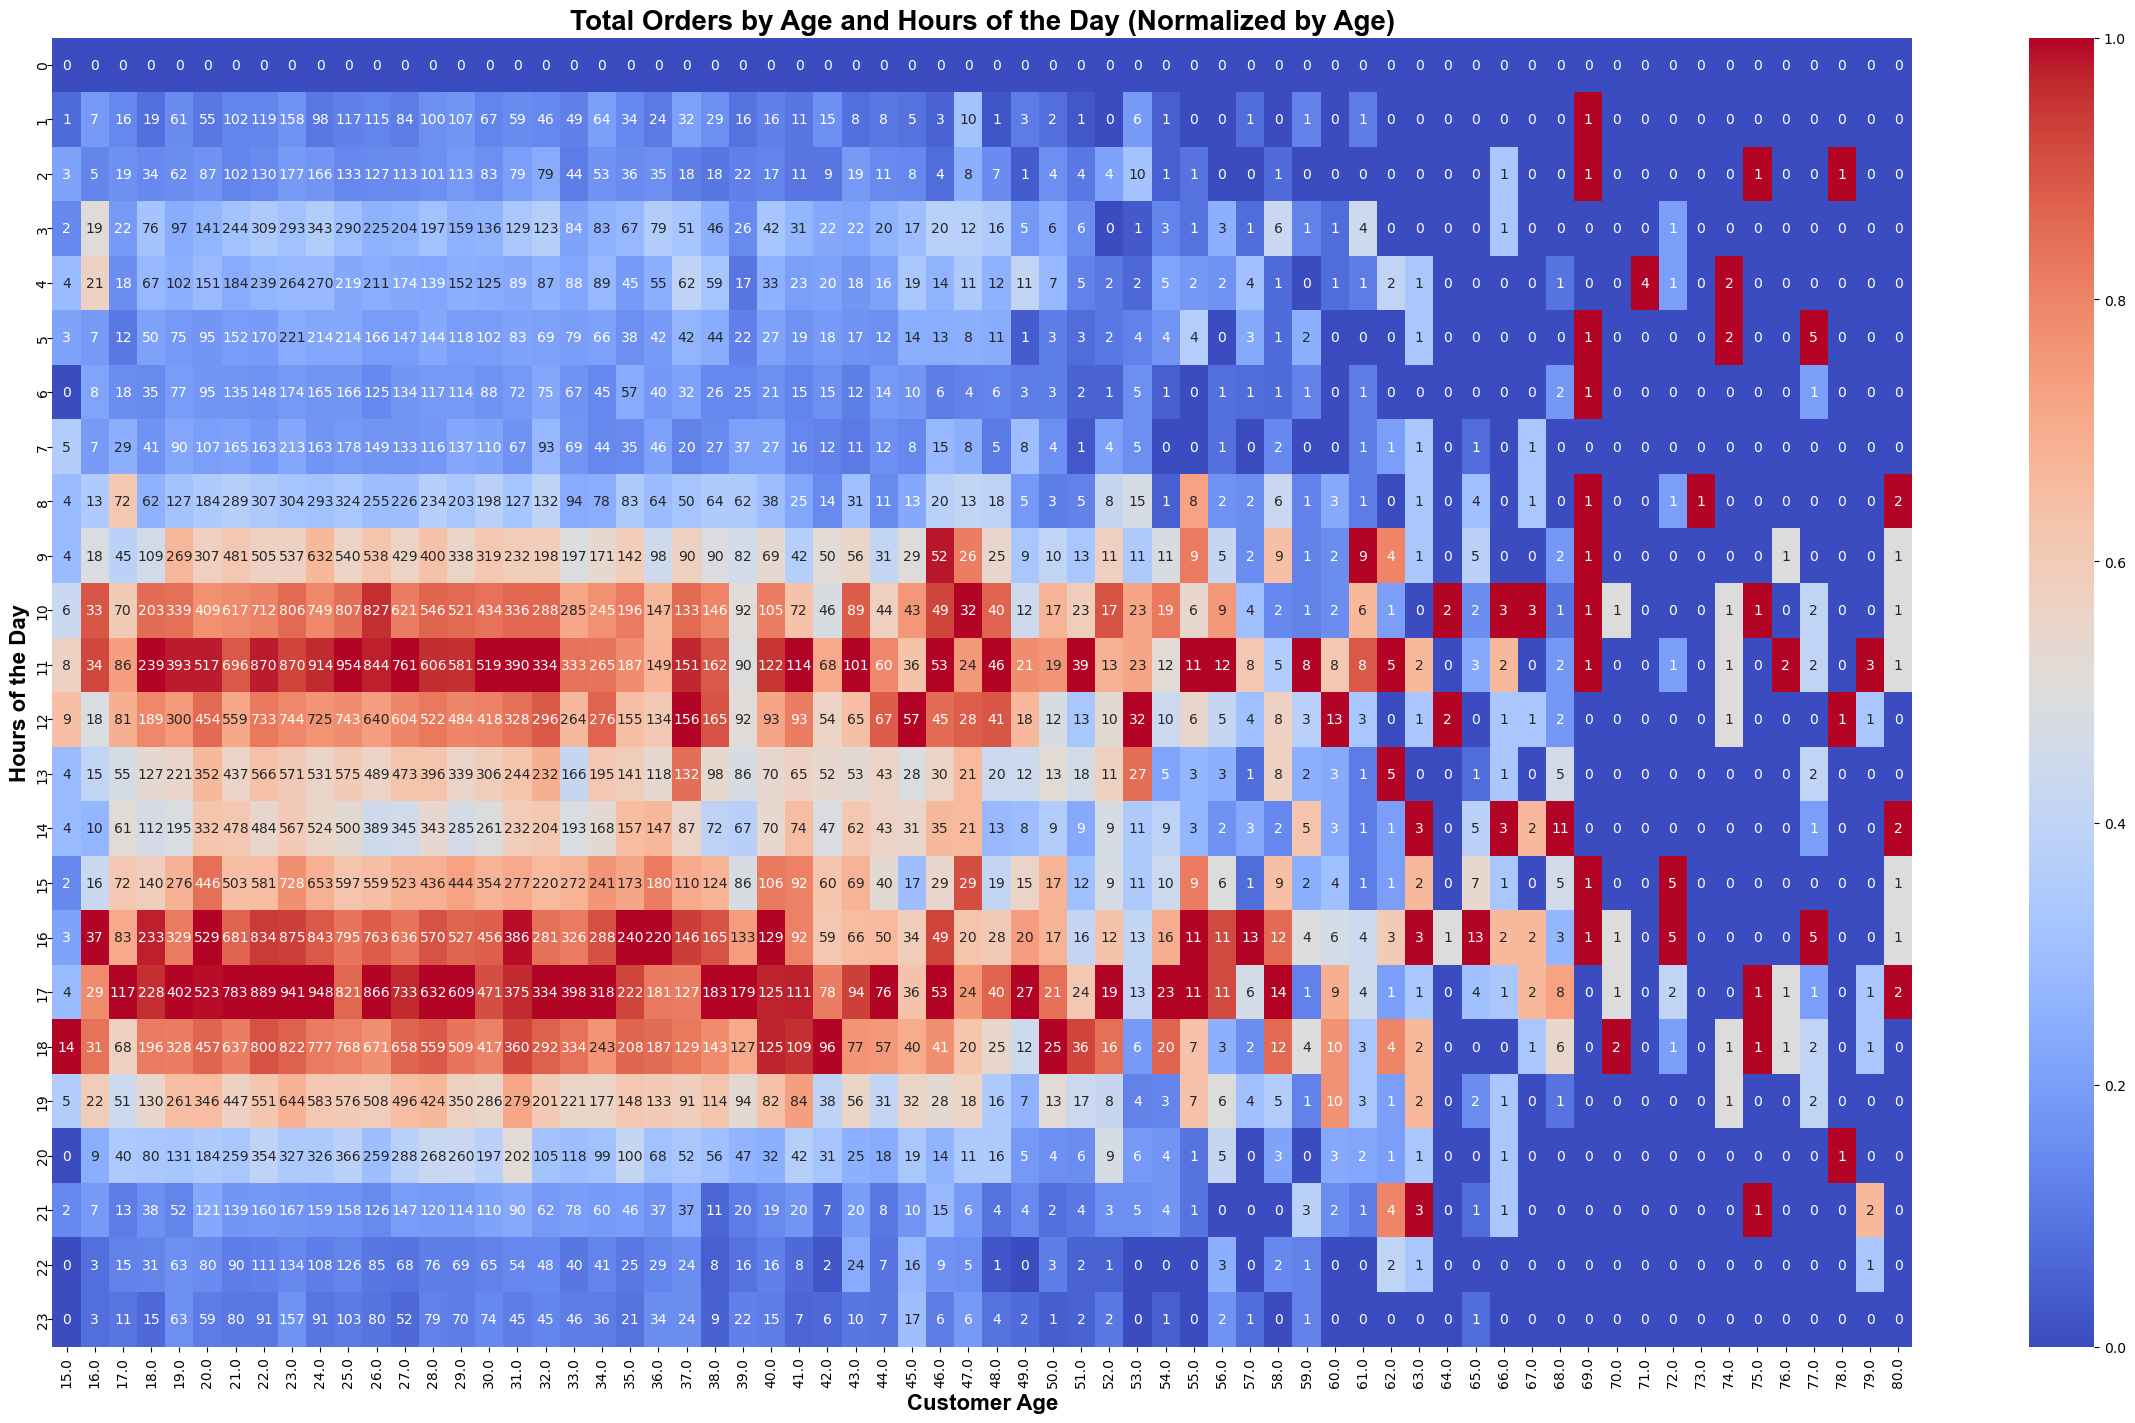

In [41]:
heatmap_data = df.groupby('customer_age')[hr_columns].sum().T

# Create a scaler instance for Min-Max normalization
scaler = MinMaxScaler()
# Normalize the 'data' dataframe (column-wise normalization)
heatmap_data_normalized = pd.DataFrame(scaler.fit_transform(heatmap_data), columns=heatmap_data.columns, index=heatmap_data.index)

# Creating the heatmap with normalized data, but using the real values for annotations
plt.figure(figsize=(30, 17))
# Create the heatmap
ax = sns.heatmap(heatmap_data_normalized, cmap='coolwarm', annot=heatmap_data, fmt='g', annot_kws={"size": 10, "ha": 'center', "va": 'center'})

# Set the title and axis labels
plt.title('Total Orders by Age and Hours of the Day (Normalized by Age)', 
          fontdict={'fontsize': 20, 'fontweight': 'bold', 'fontname': 'Arial'})

plt.xlabel('Customer Age', 
           fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontname': 'Arial'})

plt.ylabel('Hours of the Day', 
           fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontname': 'Arial'})


ytick_positions = np.arange(len(heatmap_data.index)) + 0.5  # 0.5 centers the tick in each row
# Set custom y-tick positions and labels
ax.set_yticks(ytick_positions)  # Set y-tick positions
ax.set_yticklabels(heatmap_data.index.str.replace('HR_', ''), ha='center')  # Set y-tick labels

plt.show()

We can observe that the age of the customers does not affect the time they place their orders, as the age groups have an identical relative distribution, as we can see on the gradient.

The only deviation we see, is the age of 16 where it seems customers have a high peak of ordering at 4a.m and 4a.m

From the age of 65 onwards, we can observe that customers place more orders during the dawn. However, since the data is limited and the sample size for this age group is small, we cannot draw definitive conclusions.

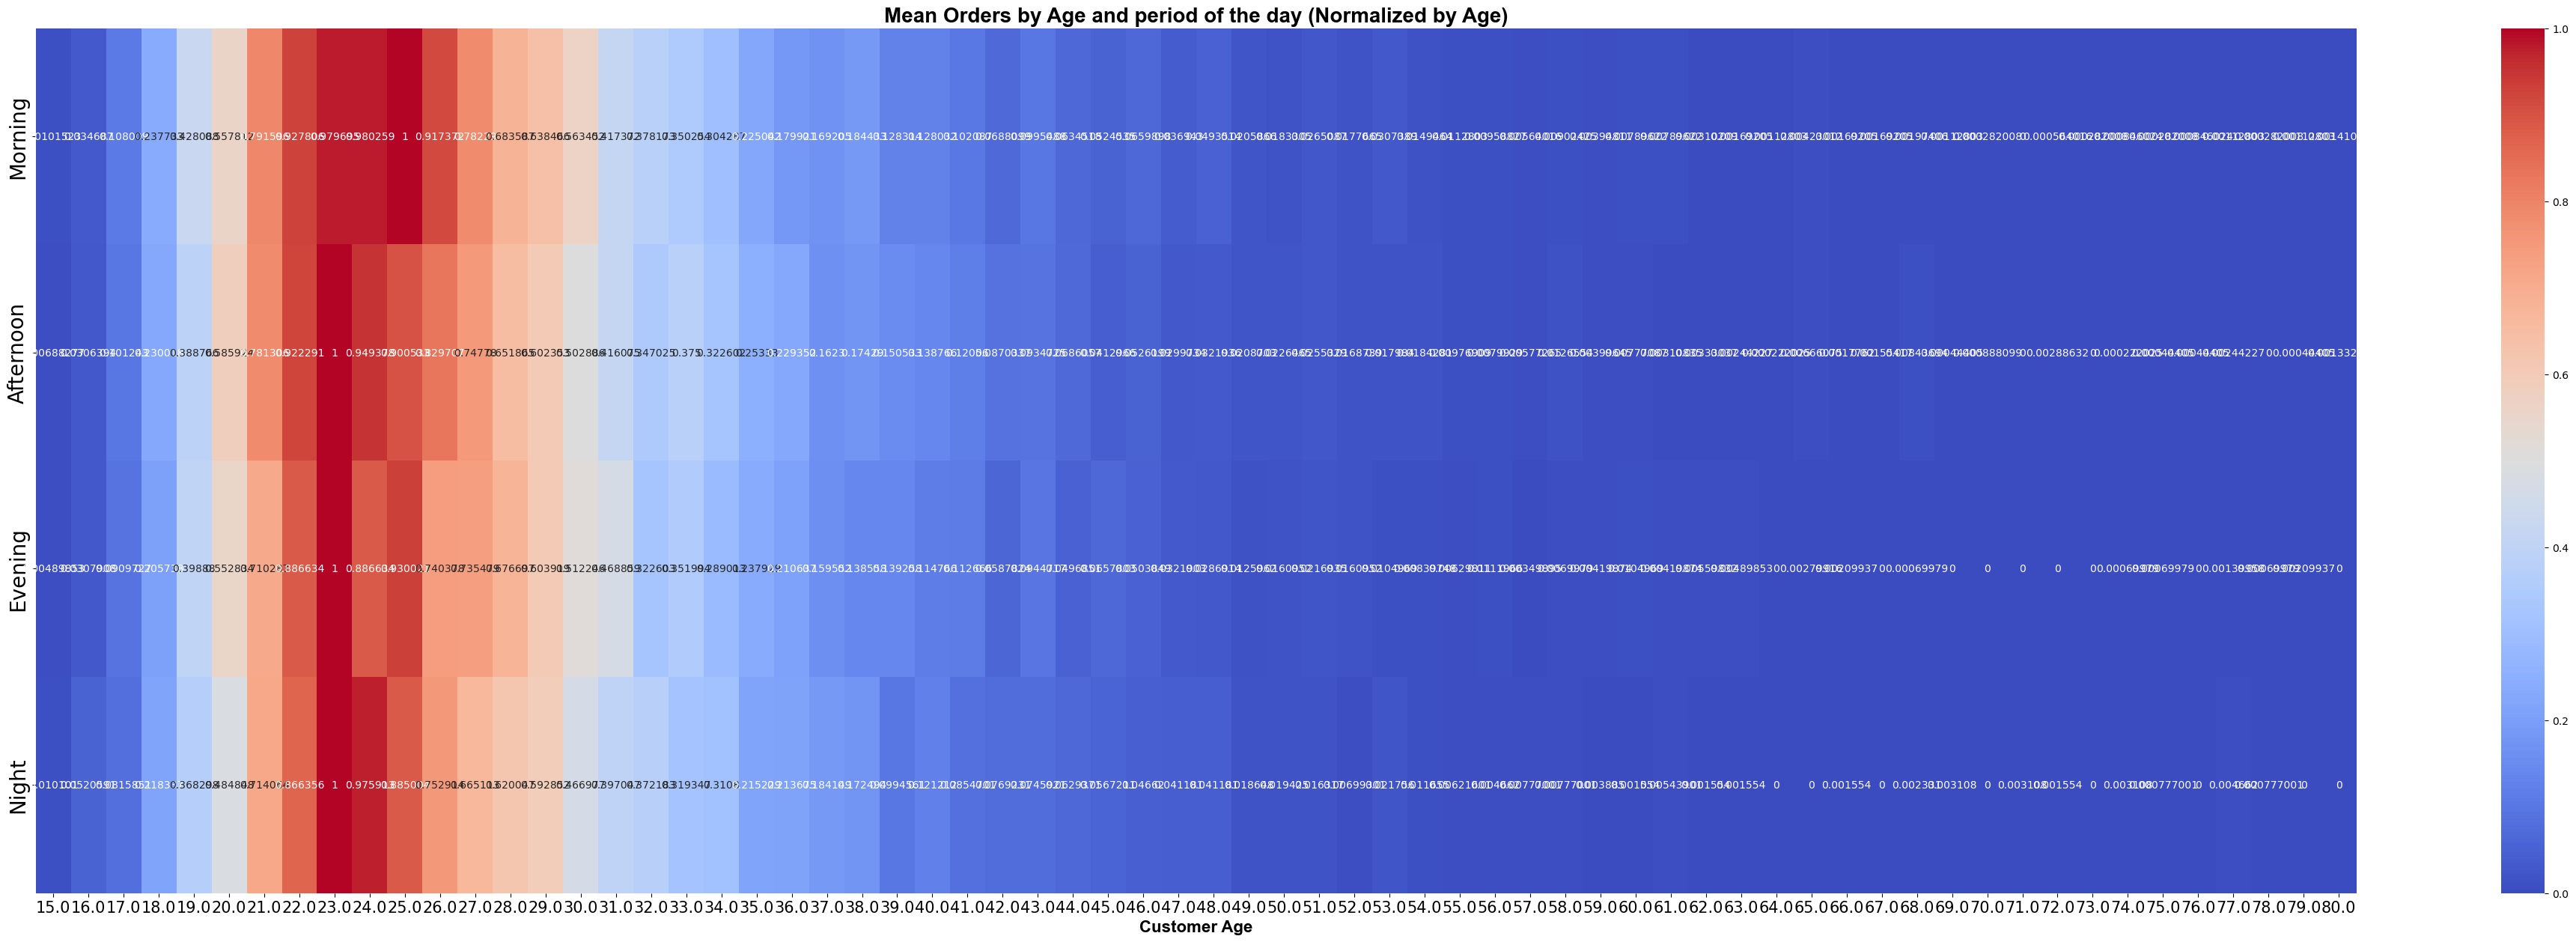

In [25]:
# Building a single dataframe with the mean orders for weekdays and weekends for each age
df_age_morning = pd.DataFrame(df.groupby('customer_age')[morning_hours].sum().mean(axis=1), columns = ['Morning'])
df_age_afternoon = pd.DataFrame( df.groupby('customer_age')[afternoon_hours].sum().mean(axis=1), columns = ['Afternoon'])
df_age_evening = pd.DataFrame(df.groupby('customer_age')[evening_hours].sum().mean(axis=1), columns = ['Evening'])
df_age_night = pd.DataFrame( df.groupby('customer_age')[night_hours].sum().mean(axis=1), columns = ['Night'])
data = pd.concat([df_age_morning, df_age_afternoon, df_age_evening, df_age_night], axis=1)

# Create a scaler instance for Min-Max normalization
scaler = MinMaxScaler()
# Normalize the 'data' dataframe (column-wise normalization)
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

plt.figure(figsize=(50, 15))
sns.heatmap(data_normalized.T, cmap='coolwarm', annot=True, fmt='g',annot_kws={"size": 10})
# Set the title and axis labels
plt.title('Mean Orders by Age and period of the day (Normalized by Age)', 
          fontdict={'fontsize': 20, 'fontweight': 'bold', 'fontname': 'Arial'})

plt.xlabel('Customer Age', 
           fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontname': 'Arial'})
# Increase the font size of the y-axis values
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=15)


plt.show()